# Classifying text messages into 'Spam' or 'Ham'

<p class="lead">This <a href="https://www.kaggle.com/uciml/sms-spam-collection-dataset">Dataset</a>
we acquired from Kaggle has a labeled dataset of text messages which falls on either 'spam' or 'ham'. We will try to look into this data, process it if necessary,fit a suitable model and predict.  </p>


## Starting with imports

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random

import nltk
from nltk.corpus import stopwords
import string

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# m_cols=['v1','v2','v3','v4']
train=pd.read_csv('spam.csv',sep=',',encoding='latin-1')

# Keeping the text data to a single column for convenience!


In [3]:
train.fillna("",inplace=True)
train['v2']=train[['v2','Unnamed: 2', 'Unnamed: 3','Unnamed: 4']].apply(lambda x: ''.join(x), axis=1)
train.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [4]:
train['Length']=train.v2.apply(len)

# The messages contain punctuations and 'stopwords' i.e frequently used english words like is,the,and,to,etc. which  usually don't play a role in the predictions.So, keeping them aside would be a good idea.

# 

In [5]:
def process_this(msg):
    punc_remove=[alpha for alpha in msg if alpha not in string.punctuation]
    punc_remove=''.join(punc_remove)
    
    processed_word=" ".join([word for word in punc_remove.split() if word.lower() not in stopwords.words('english')])
    
    return processed_word



# train.v2.head(10)
# train.v2=train['v2'].apply(process_this)    
# train.v2.head(10)

# Visualizing only the spam words counts using 'CountVectorizer'

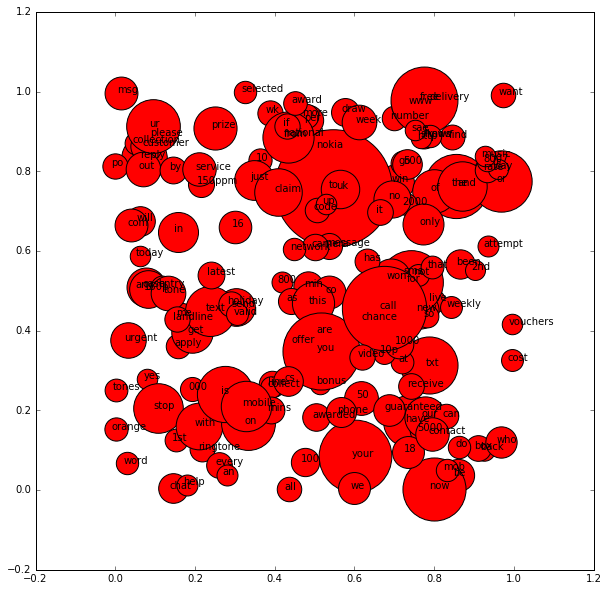

In [6]:
# train['v2'] = train['v2'].agg(lambda x: ' '.join(map(str, x)))
spam_data=train[train.v1=='spam']
train.v2.head(4)
Vectorizer=CountVectorizer().fit(spam_data.v2)

arr_=Vectorizer.transform(spam_data.v2).toarray().sum(axis=0)

word_dict={k:arr_[v] for k,v in Vectorizer.vocabulary_.items()}
x = np.random.rand(800)
y = np.random.rand(800)
i=0
plt.figure(figsize=(10,10))
for k,v in word_dict.items():
    if v<20:
        continue
    x1=x[i]
    y1=y[i]
    plt.scatter(x1,y1, s=v*20,c='red')
    plt.text(x1-0.01, y1,k, fontsize=10)
    i+=1
 

# Visualizing only 'ham' words 

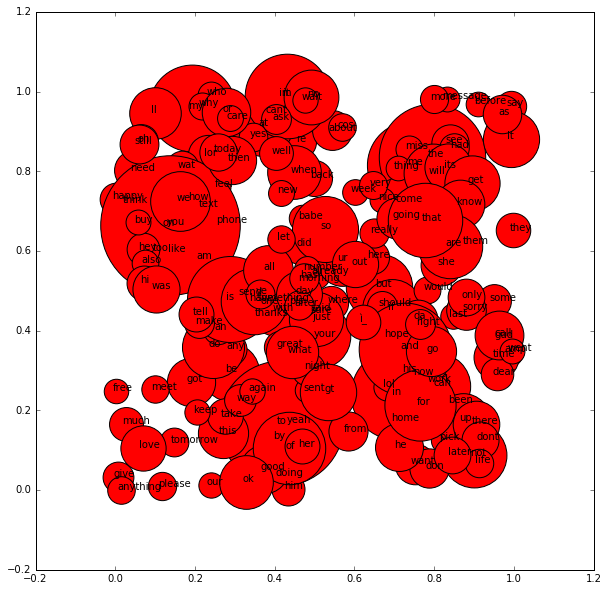

In [7]:
ham_data=train[train.v1=='ham']
Vectorizer=CountVectorizer().fit(ham_data.v2)

arr_=Vectorizer.transform(ham_data.v2).toarray().sum(axis=0)

word_dict={k:arr_[v] for k,v in Vectorizer.vocabulary_.items()}
x = np.random.rand(800)
y = np.random.rand(800)
i=0
plt.figure(figsize=(10,10))
for k,v in word_dict.items():
    if v<60:
        continue
    x1=x[i]
    y1=y[i]
    plt.scatter(x1,y1, s=v*10,c='red')
    plt.text(x1-0.01, y1,k, fontsize=10)
    i+=1

In [6]:
train_t,test_t, train_class,test_class = train_test_split(train['v2'],train['v1'],test_size=0.2)

In [7]:
pipeline = Pipeline([
    ('bow',CountVectorizer()), 
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [8]:
pipeline.fit(train_t,train_class)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [9]:
predictions = pipeline.predict(test_t)


In [10]:
print(pipeline.predict(["Hello babe i've 2 ticks for movie tonight...wanna come with 2000$ cash in hand at santa cafe??? xoxo "]))

['ham']


In [12]:
confusion_matrix(test_class,predictions)

array([[957,   0],
       [ 47, 111]])

In [13]:
print(classification_report(test_class,predictions))


             precision    recall  f1-score   support

        ham       0.95      1.00      0.98       957
       spam       1.00      0.70      0.83       158

avg / total       0.96      0.96      0.95      1115

